In [2]:
# Name : Taukir Shekh[19DCS134]
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def est_cof(x,y):
  n=np.size(x)
  m_x=np.mean(x)
  m_y=np.mean(y)

  SS_xy=np.sum(y*x)-n*m_y*m_x
  SS_xx=np.sum(x*x)-n*m_x*m_x

  b1=SS_xy/SS_xx
  b0=m_y-b1*m_x

  return(b0,b1)

In [4]:
x=np.array([1,2,3,4,5])
y=np.array([10,22,3,442,4])

b=est_cof(x,y)
print("\n Estimated Coefficient :\n b_0 : {}\n b_1 : {}".format(b[0],b[1]))


 Estimated Coefficient :
 b_0 : -26.19999999999999
 b_1 : 40.8


In [5]:
y_pred=b[0]+b[1]*x
print(y_pred)

[ 14.6  55.4  96.2 137.  177.8]


In [6]:
# Linear Regression using Library
from sklearn.linear_model import LinearRegression
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Datasets/
%ls

Mounted at /gdrive
/gdrive/MyDrive/Datasets
 Admission_Predict.csv
 Admission_Predict_Ver1.1.csv
'Breast Cancer Wisconsin Dataset.csv'
 cwurData.csv
 data.csv
 dataset_31_credit-g.csv
'default of credit card clients (1).xlsx'
'FIFA 19 Dataset.csv'


In [8]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [9]:
df.drop(['Serial No.'],inplace=True, axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
find='Chance of Admit '
y=df[find]
x=df.drop(find,axis=1,inplace=False)

In [11]:
y.head(10)

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
5    0.90
6    0.75
7    0.68
8    0.50
9    0.45
Name: Chance of Admit , dtype: float64

In [12]:
x.head(4)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1


In [13]:
regs=LinearRegression().fit(x,y)
regs.score(x,y)

0.8219007395178417

In [14]:
regs.coef_

array([0.00185851, 0.00277797, 0.00594137, 0.00158614, 0.01685874,
       0.11838505, 0.02430748])

In [15]:
regs.intercept_

-1.2757250829969908

In [26]:
y_pred1 = regs.predict(x)
y_pred1

array([0.95188302, 0.80403133, 0.65344812, 0.7445193 , 0.63154964,
       0.87449345, 0.70873689, 0.59658817, 0.55037924, 0.7166568 ,
       0.73230708, 0.8361088 , 0.85258378, 0.64376819, 0.64333755,
       0.64765144, 0.71535936, 0.65773635, 0.73739029, 0.65098033,
       0.61722139, 0.7016542 , 0.92700657, 0.96173916, 0.9588498 ,
       0.9630366 , 0.76315152, 0.51895532, 0.42608928, 0.48762151,
       0.60173397, 0.71664474, 0.92176606, 0.93714633, 0.95539958,
       0.85995516, 0.65453013, 0.53816237, 0.50482378, 0.58365522,
       0.6476116 , 0.65630992, 0.68337649, 0.84196389, 0.88546532,
       0.83497493, 0.89804598, 0.93750178, 0.80611696, 0.75506225,
       0.68278595, 0.61474312, 0.71933504, 0.69304722, 0.65695951,
       0.5898518 , 0.54253815, 0.50480029, 0.43058924, 0.622548  ,
       0.60248697, 0.62091394, 0.64323028, 0.70633145, 0.74818254,
       0.78373966, 0.78968732, 0.73240017, 0.8247072 , 0.8603845 ,
       0.95657045, 0.96154284, 0.89418791, 0.80071339, 0.76281

In [17]:
mae = sum(y-y_pred1)/y.count()
print(mae)

-5.623279619726418e-16


In [18]:
rmse = ((sum((y-y_pred1)**2))**0.5)/y.count()
print(rmse)

0.002661109115483281


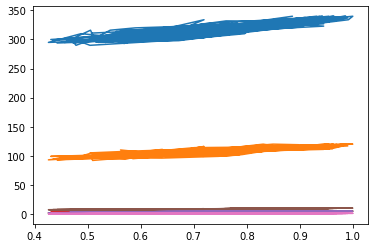

In [20]:
import matplotlib.pyplot as plt
plt.plot(y_pred1,x)

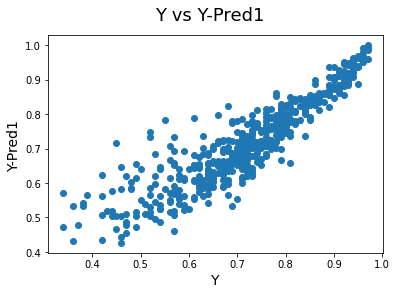

In [21]:
fig=plt.figure()
plt.scatter(y,y_pred1)
fig.suptitle('Y vs Y-Pred1', fontsize=18)
plt.xlabel('Y', fontsize=14)
plt.ylabel('Y-Pred1', fontsize=14)
plt.show()

In [22]:
lear_rate=0.0002
iter=100
m,b=0,0

In [23]:
def fun_h(m,b,x):
  return m*x+b

def fun_loss(m,b,x,y):
  return np.average(np.square(y-fun_h(m,b,x)))/2

def fun_gradient(m,b,x,y):
  dm=-np.average(y-fun_h(m,b,x))*x
  db=-np.average(y-fun_h(m,b,x))
  return (dm,db)

def fun_gradient_descent(m,b,x,y,lear_rate,iter):
  for i in range(iter):
    dm,db=fun_gradient(m,b,x,y)
    m=-lear_rate*dm
    b=-lear_rate*db
    if i%10==0:
      print(" Itereation : {} | Loss : {}".format(i,fun_loss(m,b,x,y)))
  return (m,b)

In [24]:
m,b=fun_gradient_descent(m,b,x,y,lear_rate,iter)

 Itereation : 0 | Loss : nan
 Itereation : 10 | Loss : nan
 Itereation : 20 | Loss : nan
 Itereation : 30 | Loss : nan
 Itereation : 40 | Loss : nan
 Itereation : 50 | Loss : nan
 Itereation : 60 | Loss : nan
 Itereation : 70 | Loss : nan
 Itereation : 80 | Loss : nan
 Itereation : 90 | Loss : nan


In [25]:
y_pred

array([ 14.6,  55.4,  96.2, 137. , 177.8])